**Importing Essential Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


**Basic Exploration**

In [3]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [4]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"background-color": "#a7d7c5", "color": "#003049","border": "1.5px solid #003049"})

Shape Of The Dataset : (5110, 12)

Glimpse Of The Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,nan,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1


In [5]:
dup = data[data.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {data.shape[0]} entries in this dataset.")
data.drop_duplicates(keep='first',inplace=True)
print(f"After removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 5110 entries in this dataset.
After removing duplicate entries there are 5110 entries in this dataset.


In [6]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#a7d7c5","color": "#003049","border": "1.5px solid #003049" })

Null values of the Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,201,0,0


**Data Preprocessing**

In [7]:
data.dropna(axis=0, inplace=True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#a7d7c5","color": "#003049","border": "1.5px solid #003049"})

After dropping null values, the shape of the Dataset is (4909, 12)
After dropping null values, null values of the Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
data["age"] = data["age"].astype("int")
data = data[data["gender"] != "Other"]
data["hypertension"].replace({0:"No", 1:"Yes"}, inplace = True)
data["heart_disease"].replace({0:"No", 1:"Yes"}, inplace = True)
data["stroke"].replace({0:"No", 1:"Yes"}, inplace = True)
data["ever_married"].replace({"No":"Unmarried", "Yes":"Married"}, inplace = True)
data["work_type"].replace({"Self-employed":"Self Employed","children":"Children", "Govt_job":"Government Job", "Private":"Private Job", "Never_worked":"Unemployed"}, inplace = True)
data["smoking_status"].replace({"never smoked":"Never Smoked","formerly smoked":"Formerly Smoked", "smokes":"Smokes"}, inplace = True)
data.rename(columns={"gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart Disease","ever_married":"Marital Status","work_type":"Occupation Type","Residence_type":"Residence Type","avg_glucose_level": "Average Glucose Level","bmi":"BMI","smoking_status":"Smoking Status","stroke":"Stroke"}, inplace = True)
data = data[["Age","Gender","Marital Status","BMI","Occupation Type","Residence Type","Smoking Status","Hypertension","Heart Disease","Average Glucose Level","Stroke"]]

In [9]:
print("After preprocessing, let's have a glimpse of the final dataset :")
data.head().style.set_properties(**{"background-color": "#a7d7c5","color": "#003049","border": "1.5px solid #003049"})

After preprocessing, let's have a glimpse of the final dataset :


,Age,Gender,Marital Status,BMI,Occupation Type,Residence Type,Smoking Status,Hypertension,Heart Disease,Average Glucose Level,Stroke
0,67,Male,Married,36.600000,Private Job,Urban,Formerly Smoked,No,Yes,228.690000,Yes
2,80,Male,Married,32.500000,Private Job,Rural,Never Smoked,No,Yes,105.920000,Yes
3,49,Female,Married,34.400000,Private Job,Urban,Smokes,No,No,171.230000,Yes
4,79,Female,Married,24.000000,Self Employed,Rural,Never Smoked,Yes,No,174.120000,Yes
5,81,Male,Married,29.000000,Private Job,Urban,Formerly Smoked,No,No,186.210000,Yes


In [10]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe().T.style.set_properties(**{"background-color": "#a7d7c5","color": "#003049","border": "1.5px solid #003049"})

After preprocessing, let's have a look on the summary of the dataset :


,count,mean,std,min,25%,50%,75%,max
Age,4908.000000,42.857579,22.577004,0.000000,25.000000,44.000000,60.000000,82.000000
BMI,4908.000000,28.894560,7.854320,10.300000,23.500000,28.100000,33.100000,97.600000
Average Glucose Level,4908.000000,105.297402,44.425550,55.120000,77.067500,91.680000,113.495000,271.740000


**Custom Palette For Visualization**

In [11]:
sns.set_style("white")
sns.set(rc={
    "axes.facecolor": "#DDEBF7", "figure.facecolor": "#DDEBF7","grid.color": "white"
})
sns.set_context("poster", font_scale=0.7)

palette = ["#1f77b4", "#17becf", "#9467bd", "#e377c2", "#2ca02c"]
palette_cmap = ["#2ca02c", "#1f77b4", "#9467bd", "#17becf", "#e377c2"]

**Patient's Age**

Let's have a look on the distribution of stroke patient's age :


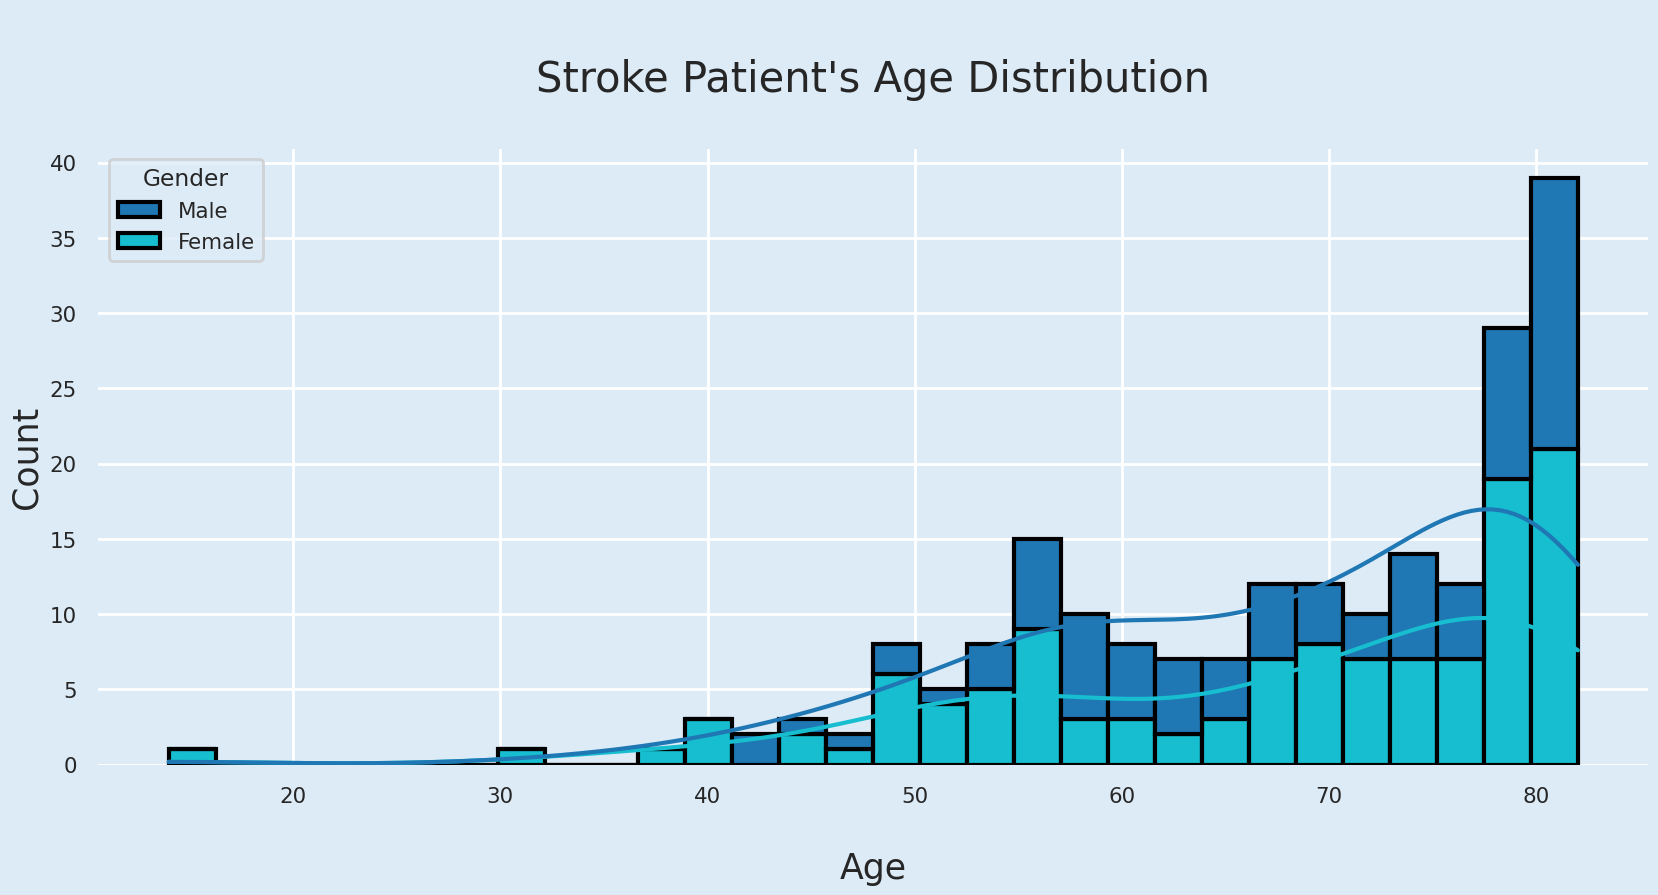

In [12]:
print(f"Let's have a look on the distribution of stroke patient's age :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data[data["Stroke"] == "Yes"],x="Age",hue="Gender",multiple="stack",palette=palette[0:2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's Age Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAge",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)
plt.show()

**Patient's Gender**

Let's have a look on the ratio of stroke patient's gender :


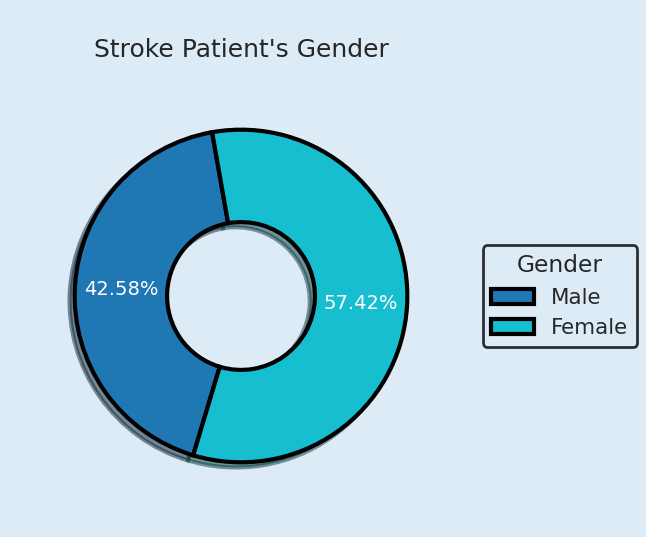

In [13]:
print(f"Let's have a look on the ratio of stroke patient's gender :")
plt.subplots(figsize=(6, 6))

labels = "Male", "Female"
size = 0.5

wedges, texts, autotexts = plt.pie(
    [data[data["Stroke"] == "Yes"]["Gender"].value_counts(ascending=True).values[0],
     data[data["Stroke"] == "Yes"]["Gender"].value_counts(ascending=True).values[1]],
    explode=(0, 0), textprops=dict(size=14, color="white"), autopct="%.2f%%",
    pctdistance=0.72,radius=.9, colors=palette[0:2], shadow=True,wedgeprops=dict(width=size, edgecolor="black", linewidth=3), startangle=100
)

plt.legend(wedges, labels, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="black")
plt.title("\nStroke Patient's Gender", fontsize=18)
plt.show()

**Patient's Smoking Status**

Let's have a look on the ratio of stroke patient's smoking status :


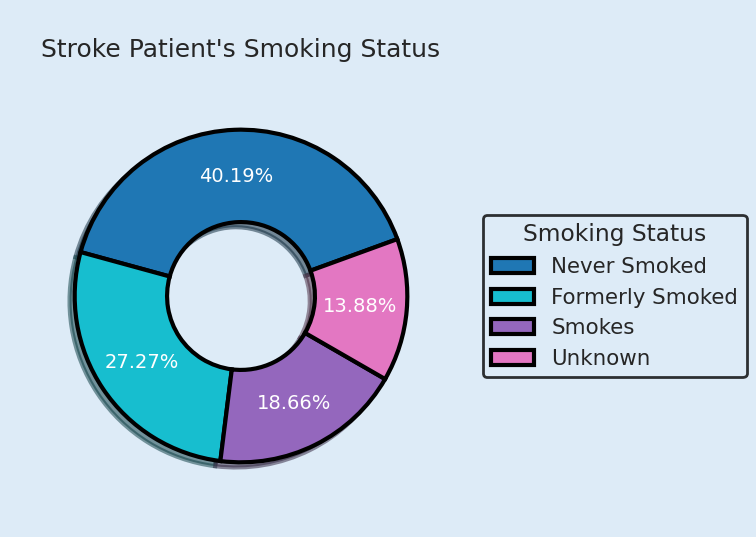

In [14]:
print(f"Let's have a look on the ratio of stroke patient's smoking status :")
plt.subplots(figsize=(6, 6))
labels = "Never Smoked", "Formerly Smoked", "Smokes", "Unknown"
size = 0.5

wedges, texts, autotexts = plt.pie(
    [data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[0],
     data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[1],
     data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[2],
     data[data["Stroke"] == "Yes"]["Smoking Status"].value_counts(ascending=False).values[3]],
    explode=(0, 0, 0, 0), textprops=dict(size=14, color="white"), autopct="%.2f%%",
    pctdistance=0.72, radius=.9, colors=palette[0:4], shadow=True,
    wedgeprops=dict(width=size, edgecolor="black", linewidth=3),startangle=20
)

plt.legend(wedges, labels, title="Smoking Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="black")
plt.title("\nStroke Patient's Smoking Status", fontsize=18)
plt.show()

**Patient's Marital Status**

Let's have a look on the ratio of stroke patient's marital status :


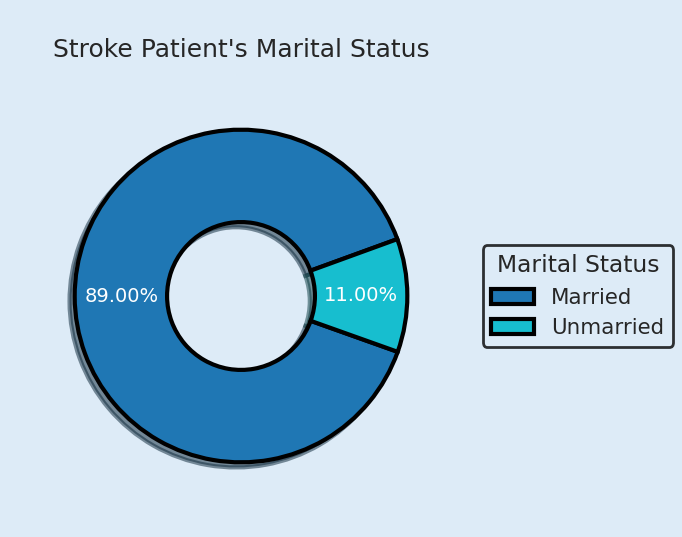

In [15]:
print(f"Let's have a look on the ratio of stroke patient's marital status :")
plt.subplots(figsize=(6, 6))

labels = "Married", "Unmarried"
size = 0.5

wedges, texts, autotexts = plt.pie(
    [data[data["Stroke"] == "Yes"]["Marital Status"].value_counts(ascending=False).values[0],
     data[data["Stroke"] == "Yes"]["Marital Status"].value_counts(ascending=False).values[1]],
    explode=(0, 0), textprops=dict(size=14, color="white"), autopct="%.2f%%", pctdistance=0.72,
    radius=.9, colors=palette[0:2], shadow=True, wedgeprops=dict(width=size, edgecolor="black", linewidth=3),
    startangle=20
)

plt.legend(wedges, labels, title="Marital Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="black")
plt.title("\nStroke Patient's Marital Status", fontsize=18)
plt.show()

**Patient's BMI**

Let's have a look on the distribution of stroke patient's BMI :


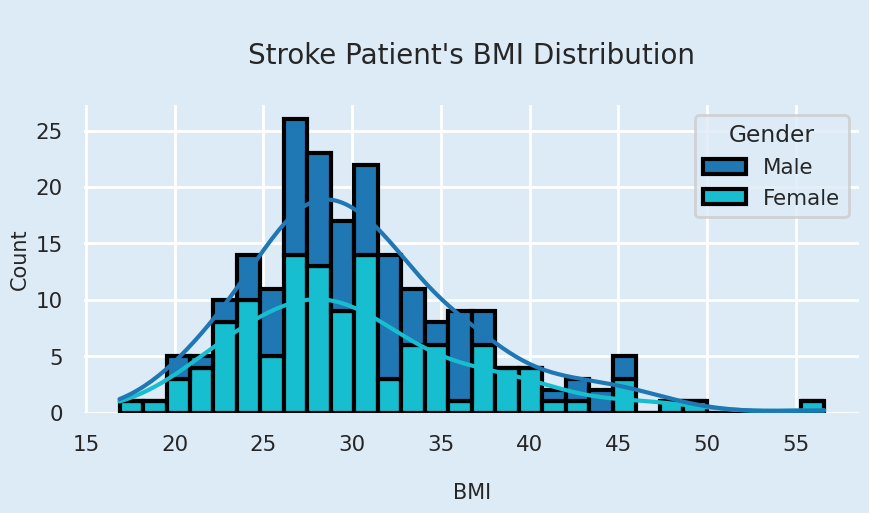

In [16]:
print(f"Let's have a look on the distribution of stroke patient's BMI :")
plt.subplots(figsize=(10, 4))

p = sns.histplot(
    data=data[data["Stroke"] == "Yes"], x="BMI", hue="Gender", multiple="stack",
    palette=palette[0:2], kde=True, bins=30, alpha=1, fill=True, edgecolor="black",
    linewidth=3
)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's BMI Distribution\n", fontsize=20)
p.set_ylabel("Count", fontsize=15)
p.set_xlabel("\nBMI", fontsize=15)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)
plt.show()

**Patient's Heart Disease Status**

Let's have a look on the ratio of stroke patient's heart disease :


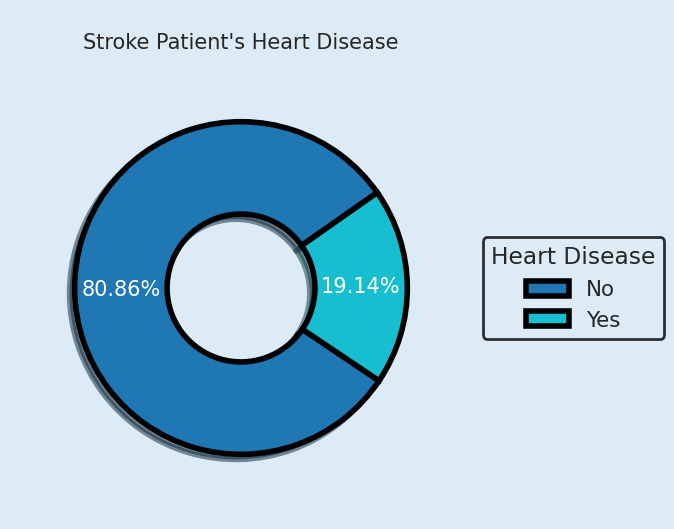

In [17]:
print(f"Let's have a look on the ratio of stroke patient's heart disease :")
plt.subplots(figsize=(6, 6))
labels = "No", "Yes"
size = 0.5

wedges, texts, autotexts = plt.pie(
    [data[data["Stroke"] == "Yes"]["Heart Disease"].value_counts(ascending=False).values[0],
     data[data["Stroke"] == "Yes"]["Heart Disease"].value_counts(ascending=False).values[1]],
    explode=(0, 0), textprops=dict(size=15, color="white"), autopct="%.2f%%", pctdistance=0.72,
    radius=0.9, colors=palette[0:2], shadow=True, wedgeprops=dict(width=size, edgecolor="black", linewidth=4),
    startangle=35)

plt.legend(wedges, labels, title="Heart Disease", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="black")
plt.title("\nStroke Patient's Heart Disease", fontsize=15)
plt.show()

**Patient's Hypertension Status**

Let's have a look on the ratio of stroke patient's hypertension status :


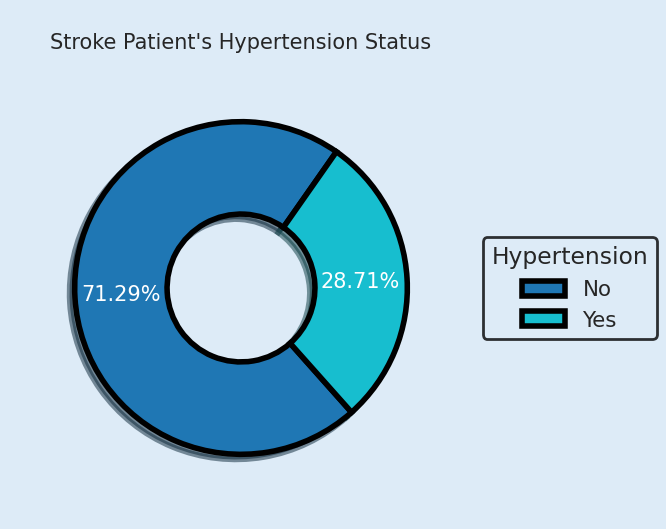

In [18]:
print(f"Let's have a look on the ratio of stroke patient's hypertension status :")
plt.subplots(figsize=(6, 6))

labels = "No", "Yes"
size = 0.5

wedges, texts, autotexts = plt.pie(
    [data[data["Stroke"] == "Yes"]["Hypertension"].value_counts(ascending=False).values[0],
     data[data["Stroke"] == "Yes"]["Hypertension"].value_counts(ascending=False).values[1]],
    explode=(0, 0), textprops=dict(size=15, color="white"), autopct="%.2f%%", pctdistance=0.72,
    radius=0.9, colors=palette[0:2], shadow=True, wedgeprops=dict(width=size, edgecolor="black", linewidth=4),
    startangle=55)

plt.legend(wedges, labels, title="Hypertension", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="black")
plt.title("\nStroke Patient's Hypertension Status", fontsize=15)
plt.show()

**Patient's Average Glucose Level**

Let's have a look on the distribution of stroke patient's average glucose level :


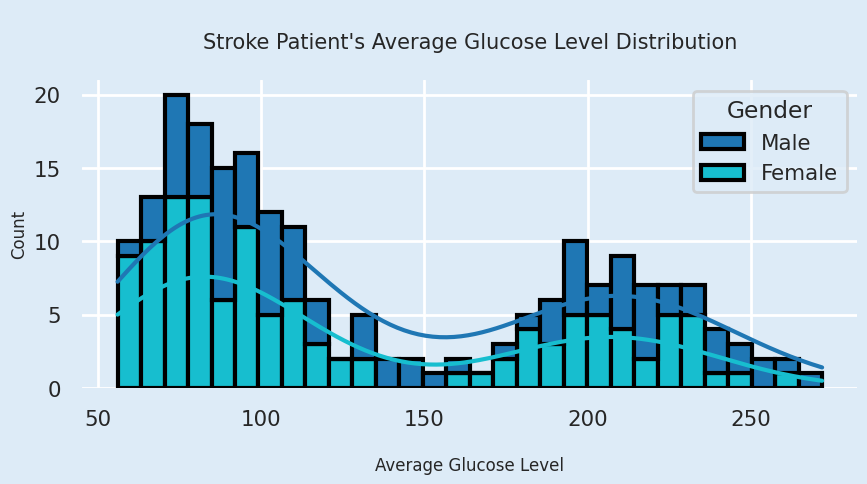

In [19]:
print(f"Let's have a look on the distribution of stroke patient's average glucose level :")
plt.subplots(figsize=(10, 4))

p = sns.histplot(
    data=data[data["Stroke"] == "Yes"], x="Average Glucose Level", hue="Gender",
    multiple="stack", palette=palette[0:2], kde=True, bins=30, alpha=1, fill=True,
    edgecolor="black", linewidth=3)
p.axes.lines[0].set_color(palette[1])
p.axes.lines[1].set_color(palette[0])
p.axes.set_title("\nStroke Patient's Average Glucose Level Distribution\n", fontsize=15)
p.set_ylabel("Count", fontsize=12)
p.set_xlabel("\nAverage Glucose Level", fontsize=12)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)
plt.show()

**Patient's Occupation**

Let's have a look on the ratio of stroke patient's occupation type :


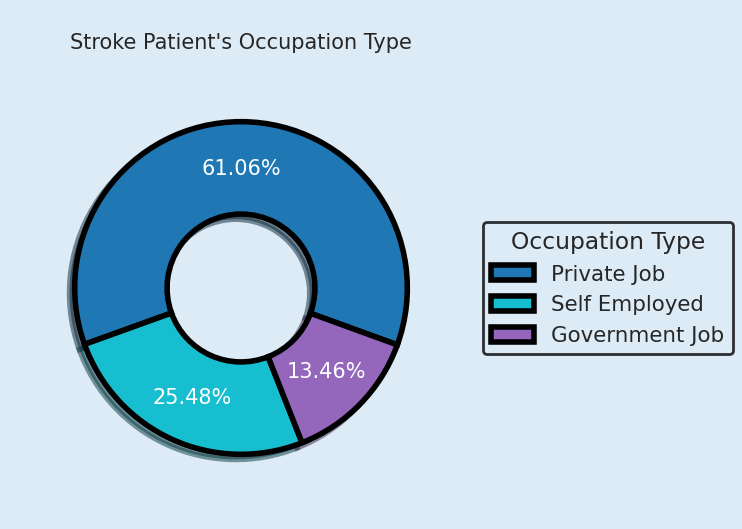

In [20]:
print(f"Let's have a look on the ratio of stroke patient's occupation type :")
plt.subplots(figsize=(6, 6))

labels = "Private Job","Self Employed","Government Job"
size = 0.5

wedges, texts, autotexts = plt.pie(
    [data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[0],
     data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[1],
     data[data["Stroke"] == "Yes"]["Occupation Type"].value_counts(ascending=False).values[2]],
    explode = (0,0,0), textprops=dict(size= 15, color= "white"), autopct="%.2f%%",  pctdistance = 0.72,
    radius=.9, colors = palette[0:3], shadow = True, wedgeprops=dict(width = size, edgecolor = "black",
    linewidth = 4), startangle = -20)

plt.legend(wedges, labels, title="Occupation Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Occupation Type", fontsize=15)  # Reduced font size
plt.show()

**Patient's Residence**

Let's have a look on the ratio of stroke patient's residence type :


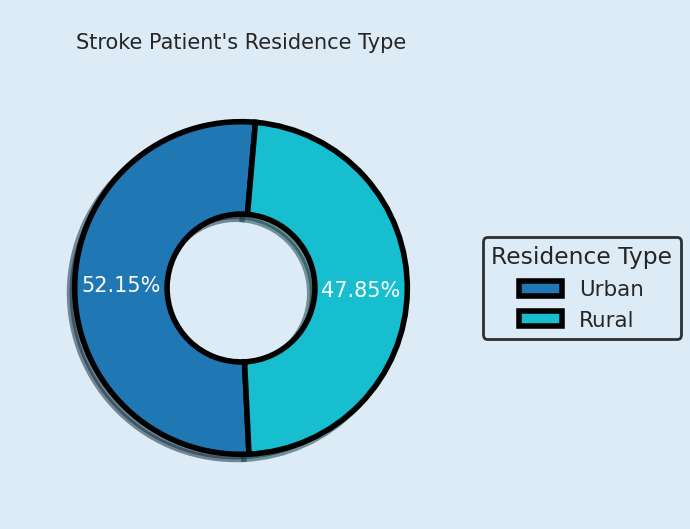

In [21]:
print(f"Let's have a look on the ratio of stroke patient's residence type :")
plt.subplots(figsize=(6, 6))

labels = "Urban", "Rural"
size = 0.5

wedges, texts, autotexts = plt.pie(
    [data[data["Stroke"] == "Yes"]["Residence Type"].value_counts(ascending=False).values[0],
     data[data["Stroke"] == "Yes"]["Residence Type"].value_counts(ascending=False).values[1]],
    explode = (0,0), textprops=dict(size= 15, color= "white"), autopct="%.2f%%", pctdistance = 0.72,
    radius=.9, colors = palette[0:2], shadow = True, wedgeprops=dict(width = size, edgecolor = "black", linewidth = 4),startangle = 85)

plt.legend(wedges, labels, title="Residence Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Residence Type", fontsize=15)
plt.show()

**Correlation Map**

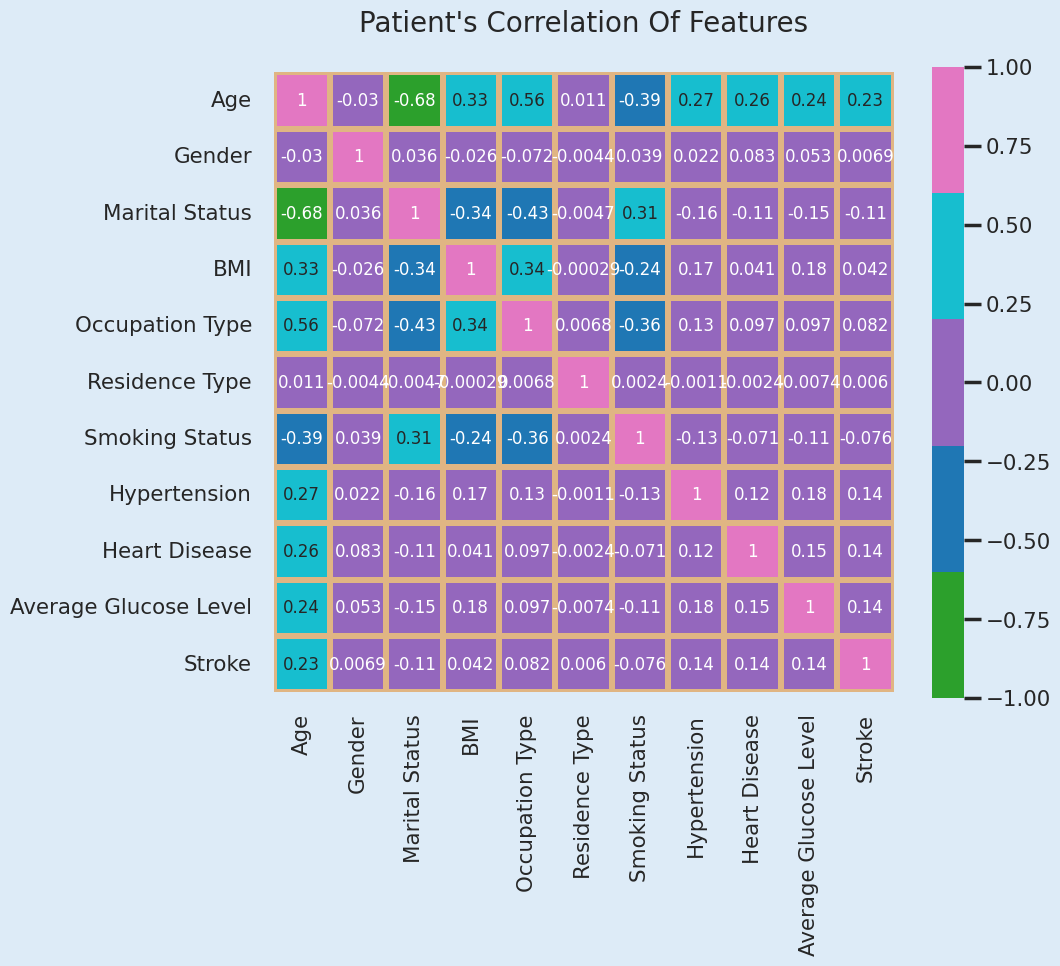

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
catcol = [col for col in data.columns if data[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])

palette_cmap = ["#2ca02c", "#1f77b4", "#9467bd", "#17becf", "#e377c2"]

plt.subplots(figsize =(10, 10))

sns.heatmap(data.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =12))
plt.title("Patient's Correlation Of Features\n", fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Model Creation & Performance Evaluation**

In [23]:
x = data.drop(["Stroke"],axis =1)
y = data["Stroke"]

sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (3926, 10), (3926,)
Shape of testing data : (982, 10), (982,)


**Logistic Regression**

In [24]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Accuracy Score of Logistic Regression : {lr_acc}")
print(f"Confusion Matrix of Logistic Regression :\n{confusion_matrix(y_test, lr_pred)}")
print(f"Classification Report of Logistic Regression :\n{classification_report(y_test, lr_pred)}")

Accuracy Score of Logistic Regression : 0.9460285132382892
Confusion Matrix of Logistic Regression :
[[929   0]
 [ 53   0]]
Classification Report of Logistic Regression :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



**K-Nearest Neighbors**

In [25]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"Accuracy Score of K-Nearest Neighbors : {knn_acc}")
print(f"Confusion Matrix of K-Nearest Neighbors :\n{confusion_matrix(y_test, knn_pred)}")
print(f"Classification Report of K-Nearest Neighbors :\n{classification_report(y_test, knn_pred)}")

Accuracy Score of K-Nearest Neighbors : 0.9439918533604889
Confusion Matrix of K-Nearest Neighbors :
[[927   2]
 [ 53   0]]
Classification Report of K-Nearest Neighbors :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.94       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.94      0.92       982



**Decision Tree**

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Accuracy Score of Decision Tree : {dt_acc}")
print(f"Confusion Matrix of Decision Tree :\n{confusion_matrix(y_test, dt_pred)}")
print(f"Classification Report of Decision Tree :\n{classification_report(y_test, dt_pred)}")

Accuracy Score of Decision Tree : 0.9103869653767821
Confusion Matrix of Decision Tree :
[[884  45]
 [ 43  10]]
Classification Report of Decision Tree :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       929
           1       0.18      0.19      0.19        53

    accuracy                           0.91       982
   macro avg       0.57      0.57      0.57       982
weighted avg       0.91      0.91      0.91       982



**Support Vector Machine**

In [27]:
svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[929   0]
 [ 53   0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


The Accuracy of Support Vector Machine is 94.6 %


**Model Comparison**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

X, y = make_classification(n_samples=1500, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-nearest Neighbors": KNeighborsClassifier(),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

results = {"Model": [], "Accuracy": [], "AUC": [], "F1 Score": []}

for name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)

    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["AUC"].append(auc)
    results["F1 Score"].append(f1)

df = pd.DataFrame(results)

df = df.round(6)
print(df.to_string(index=False))

                 Model  Accuracy      AUC  F1 Score
   Logistic Regression  0.853333 0.915272  0.855263
   K-nearest Neighbors  0.848889 0.915983  0.853448
        Decision Trees  0.908889 0.909138  0.910675
Support Vector Machine  0.904444 0.946900  0.910603


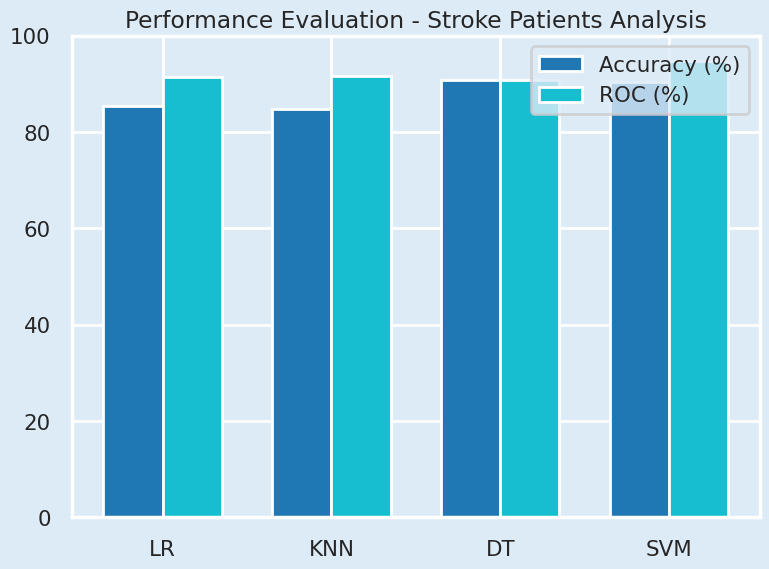

In [33]:
np.random.seed(42)

X, y = make_classification(n_samples=1500, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "LR": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

model_names = list(models.keys())
accuracies = []
roc_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred) * 100
    roc = roc_auc_score(y_test, y_prob) * 100

    accuracies.append(accuracy)
    roc_scores.append(roc)

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(model_names))

bars1 = plt.bar(index, accuracies, bar_width, label="Accuracy (%)", color="#1f77b4")
bars2 = plt.bar(index + bar_width, roc_scores, bar_width, label="ROC (%)", color="#17becf")

plt.title("Performance Evaluation - Stroke Patients Analysis")
plt.xlabel("")
plt.ylabel("")
plt.xticks(index + bar_width / 2, model_names)
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()

plt.savefig("model_performance_bar_chart.png")

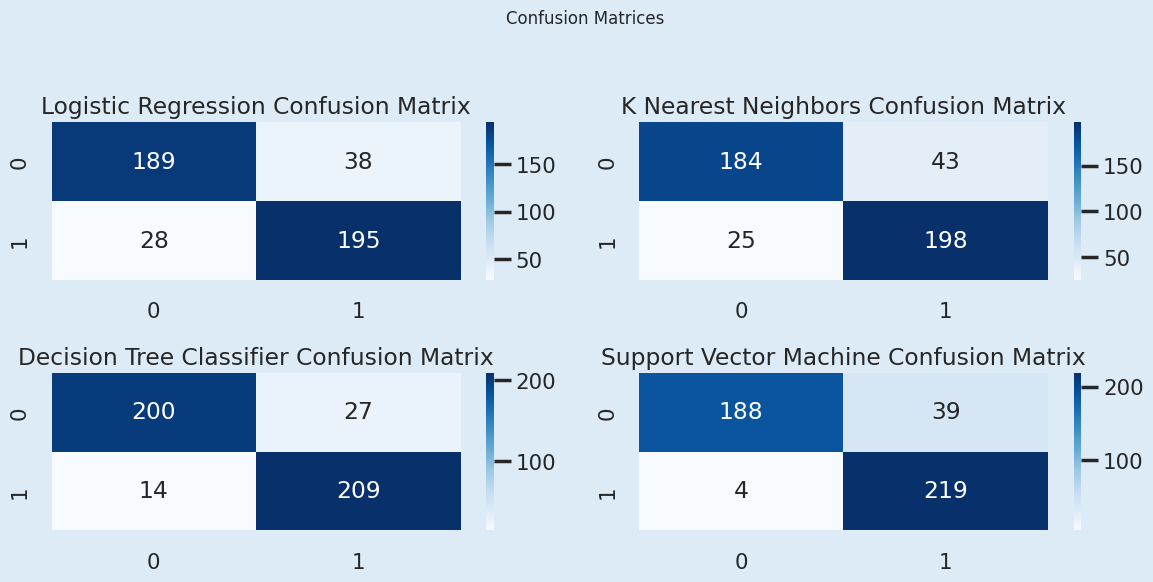

In [34]:
np.random.seed(42)

X, y = make_classification(n_samples=1500, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle("Confusion Matrices", fontsize=12)

axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx],
                xticklabels=["0", "1"], yticklabels=["0", "1"])
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("confusion_matrices_plot.png")

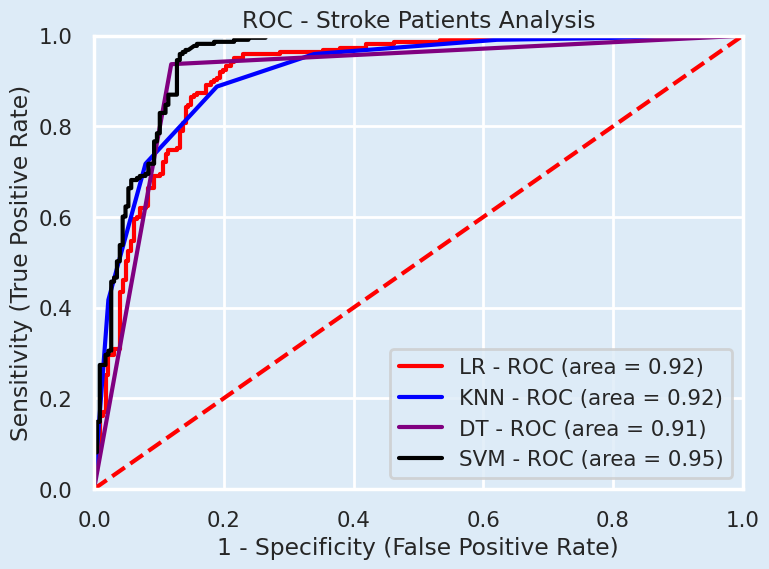

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import f1_score

np.random.seed(42)

X, y = make_classification(n_samples=1500, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "LR - ROC": LogisticRegression(random_state=42),
    "KNN - ROC": KNeighborsClassifier(),
    "DT - ROC": DecisionTreeClassifier(random_state=42),
    "SVM - ROC": SVC(probability=True, random_state=42)
}

colors = ['red', 'blue', 'purple', 'black']

plt.figure(figsize=(8, 6))

for (name, model), color in zip(models.items(), colors):

    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, color=color, label=f"{name} (area = {auc:.2f})")

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title("ROC - Stroke Patients Analysis")
plt.xlabel("1 - Specificity (False Positive Rate)")
plt.ylabel("Sensitivity (True Positive Rate)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc="lower right")

plt.tight_layout()

plt.savefig("roc_curve_plot.png")

**Making a Predictive System**

In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [41]:
np.random.seed(42)

n_samples = 1000
X, y = make_classification(n_samples=n_samples, n_features=6, n_informative=4, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

feature_names = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "smoking_status"]
data = pd.DataFrame(X, columns=feature_names)

data["age"] = np.clip(data["age"] * 10 + 50, 18, 90)
data["hypertension"] = (data["hypertension"] > 0).astype(int)
data["heart_disease"] = (data["heart_disease"] > 0).astype(int)
data["avg_glucose_level"] = np.clip(data["avg_glucose_level"] * 20 + 120, 70, 300)
data["bmi"] = np.clip(data["bmi"] * 5 + 25, 15, 50)
data["smoking_status"] = (data["smoking_status"] > 0).astype(int)

data["gender"] = np.random.choice(["Male", "Female"], size=n_samples)

data["stroke"] = y

label_encoders = {}
for col in ["gender"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop("stroke", axis=1)
y = data["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

performance = {"Model": [], "Accuracy": [], "AUC": [], "F1 Score": []}
best_model = None
best_auc = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)

    performance["Model"].append(name)
    performance["Accuracy"].append(accuracy)
    performance["AUC"].append(auc)
    performance["F1 Score"].append(f1)

    if auc > best_auc:
        best_auc = auc
        best_model = model
        best_model_name = name

performance_df = pd.DataFrame(performance)
print("Model Performance on Test Set:")
print(performance_df.round(6).to_string(index=False))
print(f"\nBest Model for Prediction: {best_model_name} (AUC = {best_auc:.2f})\n")

def predict_stroke_risk(age, hypertension, heart_disease, avg_glucose_level, bmi, smoking_status, gender):

    gender_encoded = label_encoders["gender"].transform([gender])[0]
    input_data = np.array([[age, hypertension, heart_disease, avg_glucose_level, bmi,
                            smoking_status, gender_encoded]])
    input_scaled = scaler.transform(input_data)
    prediction = best_model.predict(input_scaled)[0]
    probability = best_model.predict_proba(input_scaled)[0][1] * 100
    result = "Stroke Risk" if prediction == 1 else "No Stroke"
    return result, probability

Model Performance on Test Set:
                 Model  Accuracy      AUC  F1 Score
   Logistic Regression  0.700000 0.775995  0.648438
   K-Nearest Neighbors  0.800000 0.876201  0.785714
        Decision Trees  0.843333 0.840274  0.825279
Support Vector Machine  0.836667 0.911435  0.819188

Best Model for Prediction: Support Vector Machine (AUC = 0.91)



In [46]:
import ipywidgets as widgets
from IPython.display import display

def predict_stroke_risk(age, hypertension, heart_disease, avg_glucose_level, bmi, smoking_status, gender):
    return "Low Risk", 0.1

age_input = widgets.IntText(description="Age:")
hypertension_input = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description="Hypertension:")
heart_disease_input = widgets.Dropdown(options=[('No', 0), ('Yes', 1)], description="Heart Disease:")
glucose_input = widgets.FloatText(description="Avg Glucose Level:")
bmi_input = widgets.FloatText(description="BMI:")
smoking_input = widgets.Dropdown(options=['never smoked', 'formerly smoked', 'smokes'], description="Smoking Status:")
gender_input = widgets.Dropdown(options=['Male', 'Female', 'Other'], description="Gender:")
predict_button = widgets.Button(description="Predict")
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        result, probability = predict_stroke_risk(
            age_input.value,
            hypertension_input.value,
            heart_disease_input.value,
            glucose_input.value,
            bmi_input.value,
            smoking_input.value,
            gender_input.value
        )
        print(f"Prediction: {result}")
        print(f"Probability of Stroke: {probability * 100:.2f}%")

predict_button.on_click(on_predict_button_clicked)

display(age_input, hypertension_input, heart_disease_input, glucose_input, bmi_input, smoking_input, gender_input, predict_button, output)

IntText(value=0, description='Age:')

Dropdown(description='Hypertension:', options=(('No', 0), ('Yes', 1)), value=0)

Dropdown(description='Heart Disease:', options=(('No', 0), ('Yes', 1)), value=0)

FloatText(value=0.0, description='Avg Glucose Level:')

FloatText(value=0.0, description='BMI:')

Dropdown(description='Smoking Status:', options=('never smoked', 'formerly smoked', 'smokes'), value='never sm…

Dropdown(description='Gender:', options=('Male', 'Female', 'Other'), value='Male')

Button(description='Predict', style=ButtonStyle())

Output()